## Visualizing and analyzing line shapes in the simulated photosphere

Welcome back! Now we supposedly know everything about line formation and we can put it to work :-)

With that in mind I have prepared a simulated atmosphere (which is just a set of 3D arrays of various parameters) and a simulated spectra (which is also essentially a 3D array, we will see why. 

Let's start the adventure by loading the spectra and figuring out what it means.

In [1]:
# Our general imports at the begining

import numpy as np # basic mathematical and numerical functionallity 
import matplotlib.pyplot as plt # some plotting functionallity, for various things we will do

import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.size" : 18,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# This last line will give us a little bit nicer plot labeling

# And then some functionallity to read fits files
from astropy.io import fits 

In [2]:
stokes = fits.open("/home/milic/scratch/50G.ngrey.288x100x288_atmos_61_synth.fits")
stokes.info()

Filename: /home/milic/scratch/50G.ngrey.288x100x288_atmos_61_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (601, 4, 288, 288)   float64   


In [3]:
stokes = stokes[0].data

In [4]:
stokes.shape

(288, 288, 4, 601)

What do these dimensions mean? 

- 0 and 1 - spatial, we have 288 x 288 pixels 
- 2 is dimension 4 , that is for 4 Stokes parameters, we can discuss this later
- 3 is for wavelengths

In [5]:
# Let's extract what we need 
Intensity = np.copy(stokes[:,:,0,:])

Now, let's all agree that if I want to plot the image, I need to choose one wavelength and then plot distribution of intensity in x and y.

Text(0, 0.5, 'y[pixels]')

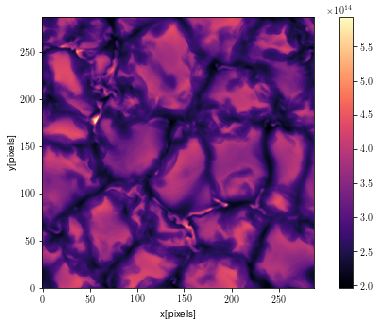

In [6]:
plt.figure(figsize=[9,5])
plt.imshow(Intensity[:,:,0].T,origin='Lower',cmap='magma')
plt.colorbar()
plt.xlabel("x[pixels]")
plt.ylabel("y[pixels]")


These are, believe it or not, granules, that is objects similar to something like this:

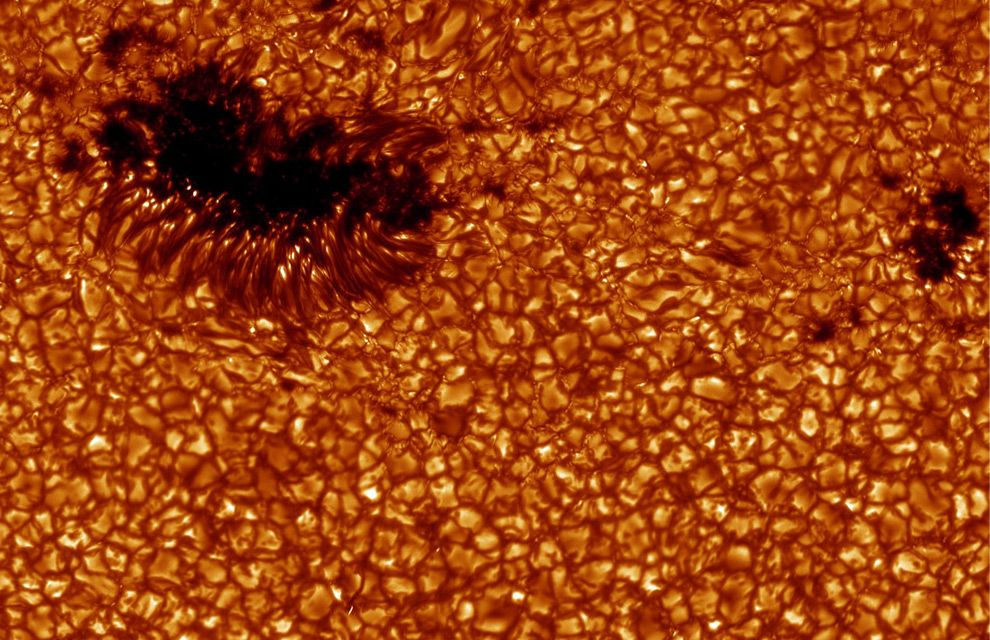

#### But you are telling us there is also some spectra there? What do you mean by that?

Well each of these pixels contains the intensity at 601 wavelength points, believe it or not. 

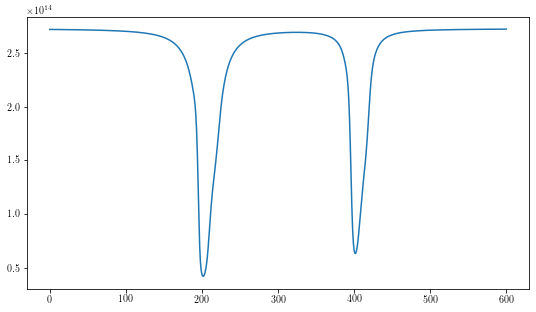

In [7]:
# To prove this, let's plot the spectrum in one of the points:
plt.figure(figsize=[9,5])
plt.plot(Intensity[0,0])


Wow! Looks like two absorption lines! Nice! 

### Let's summarize what this means: 

We have an image. And each point in the image has it's own spectrum. It is hard to visualize the 3D structure on a 2D screen so we can either:

- Plot spectrum by spectrum 
- Make images at one wavelength at the time

We plotted one spectrum, but let's just convince ourselves that they are not all the same

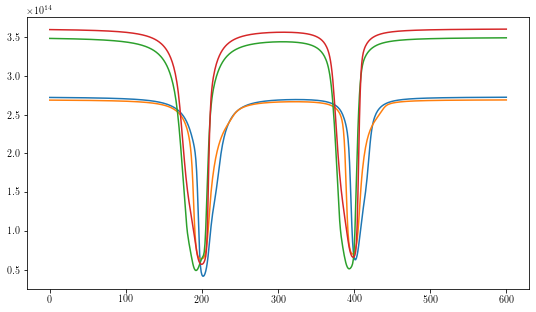

In [8]:
plt.figure(figsize=[9,5])
plt.plot(Intensity[0,0])
plt.plot(Intensity[50,50])
plt.plot(Intensity[100,100])
plt.plot(Intensity[20,21])

Nice ! Obviously some of the spectra are more similar, some are less similar, but we can see that they are, in general, not all the same. We don't know exactly what is x axis but I can tell you that. 

Text(0, 0.5, 'Intensity [CGS]')

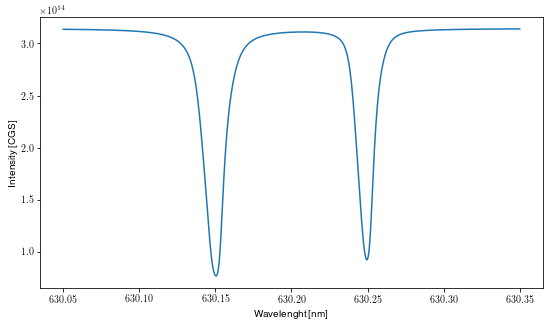

In [20]:
llambda = np.linspace(630.05,630.35,601) # nm (but we usually use angstroms)

mean_spectrum = np.mean(Intensity,axis=(0,1))
plt.figure(figsize=[9,5])
plt.plot(llambda, mean_spectrum)
plt.xlabel("Wavelenght [nm]")
plt.ylabel("Intensity [CGS]")

Why don't we try to plot images at "interesting" wavelenghts, according to the spectra above?

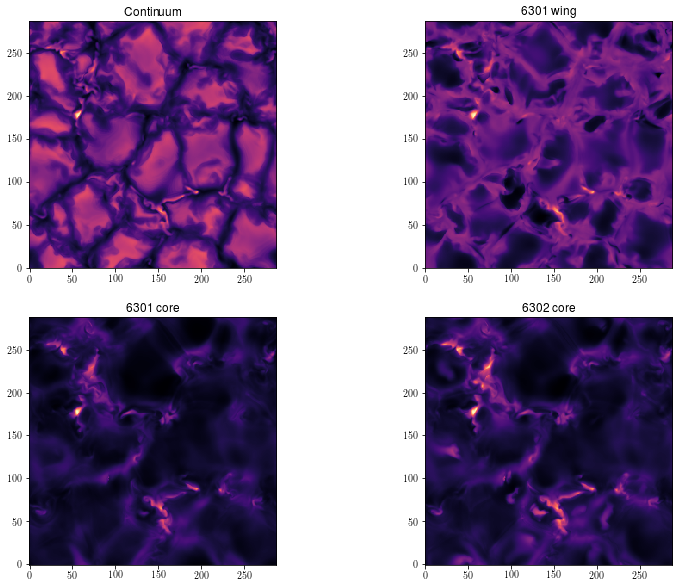

In [45]:
plt.figure(figsize=[13,10])
plt.subplot(221)
plt.imshow(Intensity[:,:,0].T,origin='Lower',cmap='magma')
plt.title("Continuum")
plt.subplot(222)
plt.title("6301 wing")
plt.imshow(Intensity[:,:,187].T,origin='Lower',cmap='magma')
plt.subplot(223)
plt.title("6301 core")
plt.imshow(Intensity[:,:,200].T,origin='Lower',cmap='magma')
plt.subplot(224)
plt.title("6302 core")
plt.imshow(Intensity[:,:,400].T,origin='Lower',cmap='magma')

## Very important question: How do you interpret this?

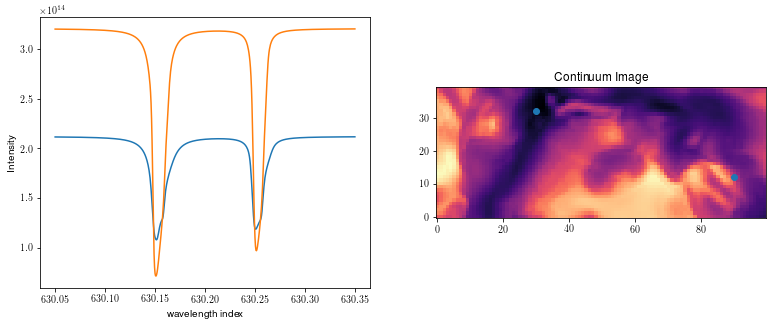

In [22]:

plt.figure(figsize=[13,5])
plt.subplot(121)
plt.plot(llambda, stokes[180,232,0])
plt.plot(llambda, stokes[240,212,0])
plt.xlabel("wavelength index")
plt.ylabel("Intensity")
plt.subplot(122)
plt.title("Continuum Image")
plt.imshow(Intensity[150:250,200:240,0].T,origin='Lower',cmap='magma')
plt.plot([30,90],[32,12],'o')

plt.savefig("inverse_gran.png",bbox_inches='tight')

## Discuss about these - 5 minutes

### Now let's test our conlusion. 

An advantage of having these simulations is that we know the "correct" answer. That is, we know what atmospheres generated these spectra. These atmospheres have been generated by the MHD simulation and we have them here and can look them up.

In [23]:
# Atmosphere is also a fits file. We will do things in a bit more compact way now: 
atmos = fits.open("/home/milic/scratch/50G.ngrey.288x100x288_atmos_61.fits")[0].data
atmos.shape


(12, 288, 288, 61)

We expect some sort of 3D structure, with various physical quantities prescribed on this grid. We can expect that 288 x 288 are again x and y coordinates, 61 is the depth dimension and first dimension stands for 12 different parameters we have gridded. I will list only the ones we are interested in. 

- 0 - Log Optical depth at 500 nm, our usual depth coordinate
- 2 - Temperature 
- 3 - Gass Pressure 
- 9 - Velocity along z axis 
- 7 - Magnetic field magnitude 
- 10 - Magnetic field inclination
- 11 - Magnetic field azimuth

In [24]:
# Let's pring out optical depth for one of these "pixels", by pixel I mean one column from the 288 x 288 grid

print(atmos[0,0,0])

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1. ]


It's a neat grid from -5 to 1, so it makes sense it's in log scale.

### 2-min question : Why is it in log scale?

In [15]:
# Let's print another one, just to see if it's he same everywhere:
print (atmos[0,133,155])

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1. ]


It is! Quite neat. Let's list some representative depths: 

- log tau = 0 at depth index 50
- log tau = -1 at depth index 40
- log tau = -2 at depth index 30 
- log tau = -3 at depth index 20 

Let's plot temperatures at one of these depths, for example log tau = 0

Text(0, 0.5, 'y[pixels]')

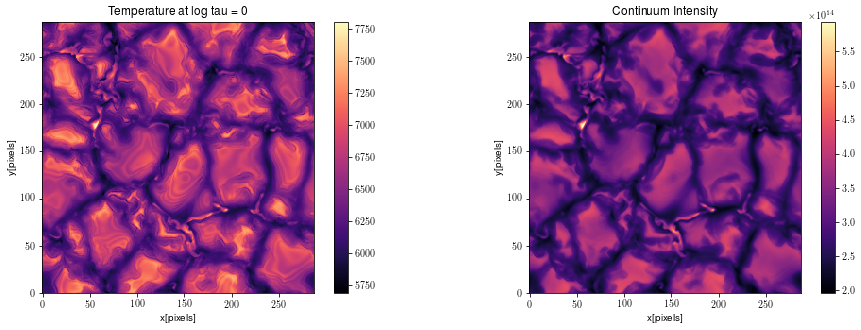

In [28]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.imshow(atmos[2,:,:,50].T,origin='Lower',cmap='magma')
plt.colorbar()
plt.title("Temperature at log tau = 0")
plt.xlabel("x[pixels]")
plt.ylabel("y[pixels]")
plt.subplot(122)
plt.imshow(Intensity[:,:,0].T,origin='Lower',cmap='magma')
plt.colorbar()
plt.title("Continuum Intensity")
plt.xlabel("x[pixels]")
plt.ylabel("y[pixels]")

### 3 min question : What does this look like and why?

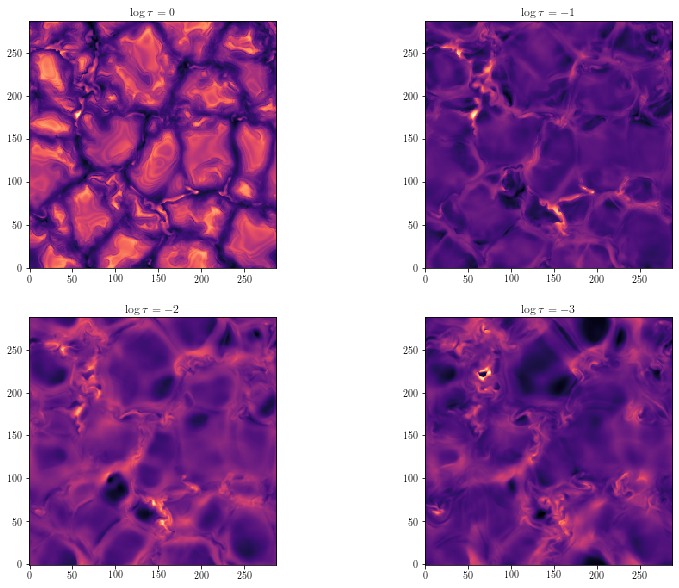

In [17]:
# Now we can plot temperatures at each of these depths:

plt.figure(figsize=[13,10])
plt.subplot(221)
plt.imshow(atmos[2,:,:,50].T,origin='Lower',cmap='magma')
plt.title("$\\log\\tau = 0$")
plt.subplot(222)
plt.title("$\\log\\tau = -1$")
plt.imshow(atmos[2,:,:,40].T,origin='Lower',cmap='magma')
plt.subplot(223)
plt.title("$\\log\\tau = -2$")
plt.imshow(atmos[2,:,:,30].T,origin='Lower',cmap='magma')
plt.subplot(224)
plt.title("$\\log\\tau = -3$")
plt.imshow(atmos[2,:,:,20].T,origin='Lower',cmap='magma')

### Any comments on these?

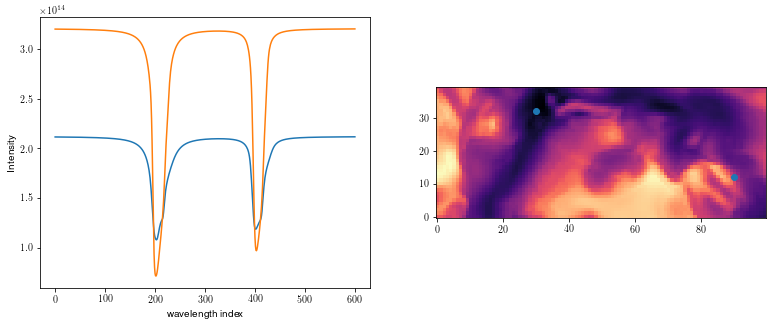

In [18]:
# Let's now try and interpret these spectra:

plt.figure(figsize=[13,5])
plt.subplot(121)
plt.plot(stokes[180,232,0])
plt.plot(stokes[240,212,0])
plt.xlabel("wavelength index")
plt.ylabel("Intensity")
plt.subplot(122)
plt.imshow(Intensity[150:250,200:240,0].T,origin='Lower',cmap='magma')
plt.plot([30,90],[32,12],'o')

plt.savefig("inverse_gran.png",bbox_inches='tight')

(4000, 8000)

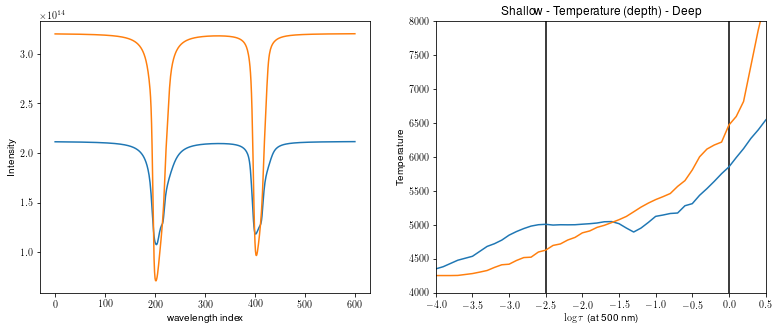

In [43]:
# We can try and plot the temperature dependence on the optical depth for these two points:
logtau = np.copy(atmos[0,0,0])

plt.figure(figsize=[13,5])
plt.subplot(121)
plt.plot(stokes[180,232,0])
plt.plot(stokes[240,212,0])
plt.xlabel("wavelength index")
plt.ylabel("Intensity")
plt.subplot(122)
plt.plot(logtau,atmos[2,180,232,:])
plt.plot(logtau,atmos[2,240,212,:])
plt.vlines(0,4000,8000)
plt.vlines(-2.5,4000,8000)
plt.title("Shallow - Temperature (depth) - Deep")
plt.xlabel("$\\log \\tau$ (at 500 nm)")
plt.ylabel("Temperature")
plt.xlim([-4.0,0.5])
plt.ylim([4000,8000])

### 5 min discussion about this! 

In "orange pixel", at optical depth equal to 1 at the continuum wavelengh, temperature is higher than in the blue pixel, so intensity in the continuum is higher in the orange pixel.

However, at the wavelength of the line core (say, 6301 line core), temperature at log tau = 0 (AT THAT WAVELENGTH), is higher in the blue pixel than in the orange pixel.


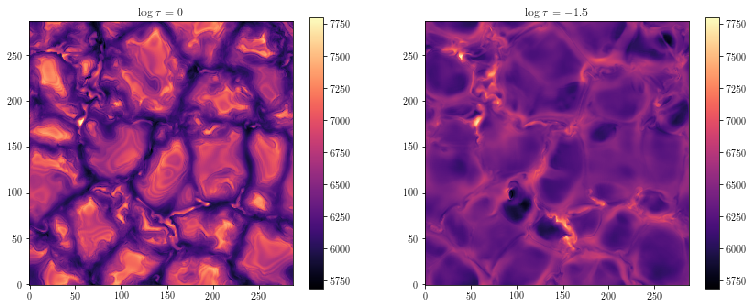

In [41]:
# Now we can plot temperatures at each of these depths:

plt.figure(figsize=[13,5])
plt.subplot(121)
plt.imshow(atmos[2,:,:,50].T,origin='Lower',cmap='magma')
plt.title("$\\log\\tau = 0$")
plt.colorbar()
plt.subplot(122)
plt.title("$\\log\\tau = -1.5$")
plt.colorbar()
plt.imshow(atmos[2,:,:,35].T,origin='Lower',cmap='magma')

### Then move to velocities and have 20-min independent work session.

In [64]:
### Finding the velocities:

# find the minimum of the spectrum in the most simple way, and deduce the velocity from that!

# (We focus only on the first line (6301.5))

def line_core_location(piece_of_spectrum, llambda):
    index_of_minimum = np.argmin(piece_of_spectrum)
    m = index_of_minimum
    p = np.polyfit(llambda[m-5:m+5],piece_of_spectrum[m-5:m+5],2)
    #wavelength_of_minimum = llambda[index_of_minimum]
    wavelength_of_minimum = -p[1]/2/p[0]
    
    return wavelength_of_minimum
    
    

In [65]:
line_cores = np.zeros([288,288])
for i in range(0,288):
    for j in range(0,288):
        line_cores[i,j] = line_core_location(Intensity[i,j,150:250],llambda[150:250])

In [66]:
# Translate wavelengths to the velocities

v = (line_cores - 630.15)/630.15 * 3E5

In [67]:
v.shape

(288, 288)

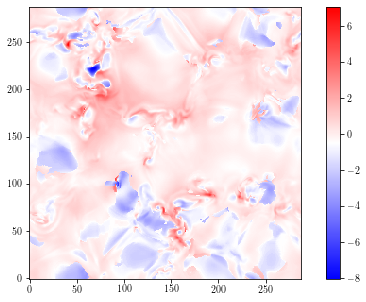

In [71]:
plt.figure(figsize=[9,5])
plt.imshow(v.T,origin='lower',cmap='bwr')
plt.colorbar()

Text(0.5, 1.0, 'velocity at $\\log\\tau = 0$')

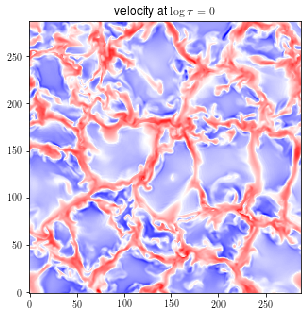

In [70]:
plt.figure(figsize=[9,5])
plt.imshow(-atmos[9,:,:,50].T,origin='Lower',cmap='bwr')
plt.title("velocity at $\\log\\tau = 0$")